***IMPORTING*** ***LIBRARIES***

In [3]:
# Data Frame 
import pandas as pd
import numpy as np
import re

#plotting
import matplotlib.pyplot as plt
import seaborn as sns 
from wordcloud import WordCloud

#nltk
import nltk 
import warnings 
import string
warnings.filterwarnings("ignore", category=DeprecationWarning)

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
import spacy

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve,auc,f1_score
from sklearn.model_selection import  train_test_split
from sklearn.model_selection import cross_val_score 

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC 
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import Perceptron

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


***LOADING*** ***DATASET***

In [4]:
#data =  pd.read_csv('/content/MLproject file.csv',encoding='latin', names = ['polarity','id','date','query','user','text']) 
data=pd.read_csv('/content/training.1600000.processed.noemoticon.csv',encoding='latin', names = ['polarity','id','date','query','user','text']) 
data

,polarity,id,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [12]:
data = data.sample(frac=1)
data = data[:200000]   

***DATA*** ***VISUALIZATION***

In [13]:
print("Dataset shape:", data.shape) 

Dataset shape: (200000, 6)


In [14]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200000 entries, 13480 to 928885
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   polarity  200000 non-null  int64 
 1   id        200000 non-null  int64 
 2   date      200000 non-null  object
 3   query     200000 non-null  object
 4   user      200000 non-null  object
 5   text      200000 non-null  object
dtypes: int64(2), object(4)
memory usage: 10.7+ MB


In [15]:
data.describe()

,polarity,id
count,200000.000000,2.000000e+05
mean,1.996060,1.999134e+09
std,2.000001,1.929410e+08
min,0.000000,1.467812e+09
25%,0.000000,1.957101e+09
50%,0.000000,2.002063e+09
75%,4.000000,2.177006e+09
max,4.000000,2.329205e+09


In [16]:
data.polarity.unique()

array([0, 4])

In [17]:
# Replacing the value 4 -->1 for ease of understanding.
data['polarity'] = data['polarity'].replace(4,1)
data.head() 

,polarity,id,date,query,user,text
13480,0,1553268374,Sat Apr 18 13:48:56 PDT 2009,NO_QUERY,SuzyKaaay,at work. Feeling sickly
1445255,1,2062363381,Sat Jun 06 23:01:27 PDT 2009,NO_QUERY,Kbselby1989,@marymagdalan WOOOOOOO WOOO WOOO WOOO WOO WOO...
1131854,1,1975924599,Sat May 30 16:11:56 PDT 2009,NO_QUERY,joyofzen,"Nice, my Yahoo Music thing automatically opene..."
1091375,1,1969882419,Sat May 30 01:35:12 PDT 2009,NO_QUERY,xloveisonitsway,"@TashaLxo ooh okay,I take English combined, ha..."
1125365,1,1974833186,Sat May 30 13:55:22 PDT 2009,NO_QUERY,BOBBYADAN,@donnieklang Isn't sweet tea THE BEST!? When y...


In [18]:
data = data.reset_index(drop=True)
data.head() 

,polarity,id,date,query,user,text
0,0,1553268374,Sat Apr 18 13:48:56 PDT 2009,NO_QUERY,SuzyKaaay,at work. Feeling sickly
1,1,2062363381,Sat Jun 06 23:01:27 PDT 2009,NO_QUERY,Kbselby1989,@marymagdalan WOOOOOOO WOOO WOOO WOOO WOO WOO...
2,1,1975924599,Sat May 30 16:11:56 PDT 2009,NO_QUERY,joyofzen,"Nice, my Yahoo Music thing automatically opene..."
3,1,1969882419,Sat May 30 01:35:12 PDT 2009,NO_QUERY,xloveisonitsway,"@TashaLxo ooh okay,I take English combined, ha..."
4,1,1974833186,Sat May 30 13:55:22 PDT 2009,NO_QUERY,BOBBYADAN,@donnieklang Isn't sweet tea THE BEST!? When y...


In [19]:
# check the number of positive vs. negative tagged sentences
positives = data['polarity'][data.polarity == 1 ]
negatives = data['polarity'][data.polarity == 0 ]

print('Total length of the data is:         {}'.format(data.shape[0]))
print('No. of positve tagged sentences is:  {}'.format(len(positives)))
print('No. of negative tagged sentences is: {}'.format(len(negatives)))

Total length of the data is:         200000
No. of positve tagged sentences is:  99803
No. of negative tagged sentences is: 100197


In [20]:
#correlation of the length of a tweet with its polarity
target_0 = []
target_1 = []
for i in range(data.shape[0]):
  if (data['polarity'][i]==1):
    target_1.append(len(data['text'][i]))
  elif (data['polarity'][i]==0):
    target_0.append(len(data['text'][i]))

print(target_0)
print('\n')
print(target_1)

[24, 43, 15, 23, 93, 128, 13, 110, 22, 27, 61, 117, 51, 137, 96, 76, 75, 60, 66, 81, 90, 137, 136, 114, 50, 21, 28, 27, 115, 70, 40, 70, 25, 130, 15, 125, 76, 98, 113, 106, 70, 38, 54, 35, 51, 112, 115, 70, 53, 82, 128, 129, 75, 55, 122, 41, 136, 127, 66, 56, 65, 29, 38, 103, 69, 132, 131, 66, 22, 37, 127, 85, 75, 88, 70, 138, 135, 127, 33, 136, 42, 125, 113, 80, 70, 95, 106, 48, 68, 94, 125, 123, 25, 136, 116, 39, 136, 31, 38, 70, 28, 43, 66, 54, 40, 40, 109, 46, 75, 80, 39, 55, 89, 39, 55, 138, 33, 119, 99, 110, 32, 14, 138, 105, 39, 90, 69, 50, 73, 32, 53, 22, 27, 96, 62, 102, 76, 25, 75, 42, 63, 74, 29, 45, 99, 62, 136, 38, 65, 22, 27, 74, 38, 54, 38, 25, 41, 28, 59, 119, 86, 76, 56, 23, 46, 127, 127, 128, 137, 123, 50, 82, 41, 37, 78, 38, 49, 96, 67, 26, 115, 119, 27, 48, 29, 52, 59, 39, 113, 15, 39, 14, 98, 131, 82, 50, 95, 107, 80, 98, 104, 49, 59, 77, 27, 117, 100, 109, 23, 34, 50, 68, 75, 60, 29, 95, 44, 24, 83, 126, 137, 49, 104, 78, 87, 84, 137, 29, 100, 18, 65, 38, 82, 132,

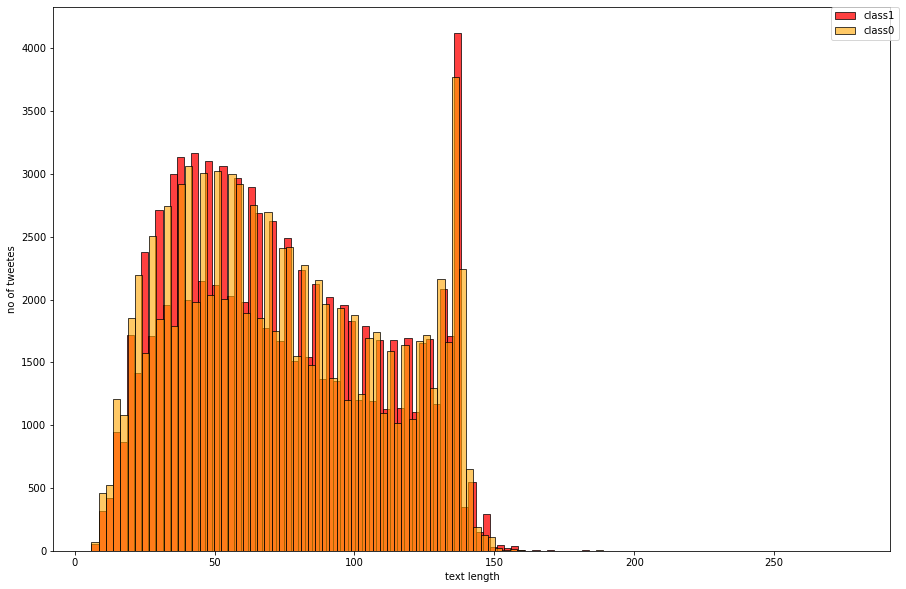

In [ ]:
plt.figure(figsize=(15,10)) 
sns.histplot(data=target_1, color='red', label = "class1").set(xlabel="text length",ylabel = "no of tweetes" )
sns.histplot(data=target_0, color='orange', alpha=0.6, label = "class0").set(xlabel="text length",ylabel = "no of tweetes" )
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0) 
plt.show()

In [ ]:
# get a word count per of text
def word_count(words):
    return len(words.split())

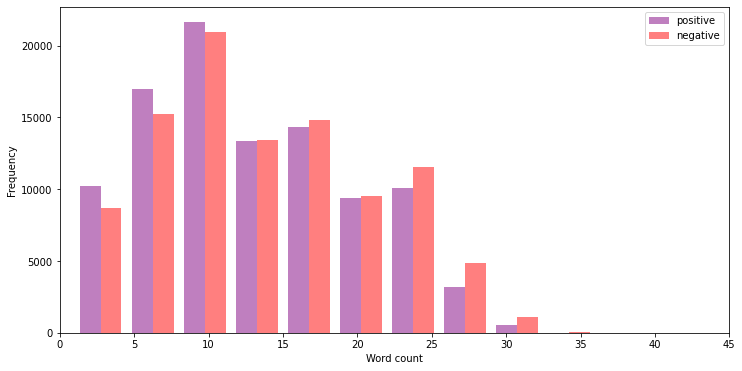

In [ ]:
# plot word count distribution for both positive and negative 
import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)
data['word count'] = data['text'].apply(word_count)
p = data['word count'][data.polarity == 1]
n = data['word count'][data.polarity == 0]
plt.figure(figsize=(12,6))
plt.xlim(0,45)
plt.xlabel('Word count')
plt.ylabel('Frequency')
g = plt.hist([p, n], color=['purple','red'], alpha=0.5, label=['positive','negative'])
plt.legend(loc='upper right')

***DATA*** ***PROCESSING***

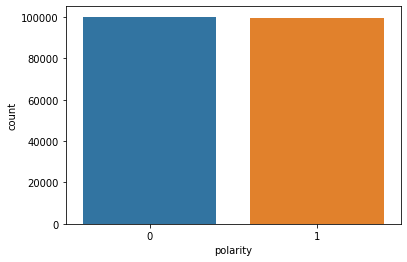

In [21]:
#Ploting the count for each target
sns.countplot(x = 'polarity', data = data) 

In [22]:
#converting pandas object to string type
df = data.loc[:,("text",)]
#df = data[["text" , ]]
df["text"] = df["text"].astype(str)

df.head()

,text
0,at work. Feeling sickly
1,@marymagdalan WOOOOOOO WOOO WOOO WOOO WOO WOO...
2,"Nice, my Yahoo Music thing automatically opene..."
3,"@TashaLxo ooh okay,I take English combined, ha..."
4,@donnieklang Isn't sweet tea THE BEST!? When y...


In [23]:
# number of null values in each column
for i in data:
    print(i,"=",data[i].isnull().sum()) 

polarity = 0
id = 0
date = 0
query = 0
user = 0
text = 0


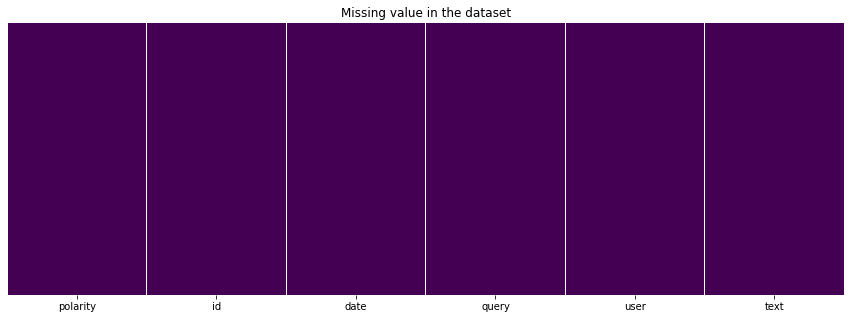

In [24]:
plt.figure(figsize=(15,5))
sns.heatmap(data.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset');

In [25]:
from collections import Counter
cnt = Counter()
for text in df["text"].values:
    for word in text.split():
        cnt[word] += 1

In [26]:
import re
def remove_doublespace(text):       
  return  re.sub(' +',' ',text)

def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])


FREQWORDS = set([w for (w, wc) in cnt.most_common(20)])
def remove_freqwords(text):
    """custom function to remove the frequent words"""
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])

n_rare_words = 20
RAREWORDS = set([w for (w, wc) in cnt.most_common()[:-n_rare_words-1:-1]])
def remove_rarewords(text):
    """custom function to remove the rare words"""
    return " ".join([word for word in str(text).split() if word not in RAREWORDS])

from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])

In [27]:
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

In [28]:

df["text_processed"] = df.loc[:,("text")].str.lower()
df["text_processed"] = df.loc[:,("text_processed")].apply(lambda text: remove_doublespace(text))
df["text_processed"] = df.loc[:,("text_processed")].apply(lambda text: remove_urls(text))
df["text_processed"] = df.loc[:,("text_processed")].apply(lambda text: remove_punctuation(text))
df["text_processed"] = df.loc[:,("text_processed")].apply(lambda text: remove_stopwords(text))
df["text_processed"] = df.loc[:,("text_processed")].apply(lambda text: remove_freqwords(text))
df["text_processed"] = df.loc[:,("text_processed")].apply(lambda text: remove_rarewords(text))
df["text_processed"] = df.loc[:,("text_processed")].apply(lambda text: lemmatize_words(text))
df["text_processed"] = df.loc[:,("text_processed")].apply(lambda text: remove_emoji(text))


In [ ]:
df.head()

,text,text_processed
0,Church was amazing! I'm not to happpy right no...,church amaze im happpy right though im sunburnt
1,Can't believe Margaret is leaving though,cant believe margaret leave though
2,Hey guys i am Sitting right now outside here a...,hey guy sit right outside alone 19th birthday ...
3,I miss the Lime Spider,miss lime spider
4,Cherry tree update: But the first day of full ...,cherry tree update first day full bloom also b...


In [29]:
data["text_processed"] = df["text_processed"]

posTGT_df = data[data.polarity == 1]
negTGT_df = data[data.polarity == 0]
Pos_tgt_text = " ".join(review for review in posTGT_df.text_processed.astype(str))

Neg_tgt_text = " ".join(review for review in negTGT_df.text_processed.astype(str))

print(data)

        polarity  ...                                     text_processed
0              0  ...                                work feeling sickly
1              1  ...  marymagdalan wooooooo wooo wooo wooo woo woo w...
2              1  ...   nice yahoo music thing automatically open 80 pop
3              1  ...  tashalxo ooh okayi take english combine hate l...
4              1  ...  donnieklang isnt sweet tea best make way back ...
...          ...  ...                                                ...
199995         0  ...  ugh sprint need offer good phone need new one ...
199996         1  ...                                            new toy
199997         1  ...  way hometoday uber funnseriously great dayi lo...
199998         0  ...                                     soakemi really
199999         1  ...  darlinejasmin whoa another keeper really under...

[200000 rows x 7 columns]


In [30]:
#count of unique words
words = []
words_class0 = []
words_class1 = [] 
for i in range(len(data['text_processed'])):
    for j in data['text_processed'][i].split():
        words.append(j)
        if data['polarity'][i]==0:
            words_class0.append(j)
        elif data['polarity'][i]==1:
            words_class1.append(j)
words_unique = set(words)
words_unique


{'enuf',
 'fabwill',
 'nickybelly',
 'planesitting',
 'leannsoto',
 'quotlilliquot',
 'blogspotcom',
 'pablovega8',
 'kamesy',
 'mrskellybelly',
 'jaybirdh',
 'fmx',
 'jackas',
 'bitter',
 'wipeoutcracking',
 'realpattinson',
 'deceit',
 'tanned',
 'oakleafchurch',
 'gop',
 'codecutr',
 'panera',
 'mparaz',
 'dalat',
 'fithly',
 'mikeboyd',
 'adwilbanks',
 'luckyfortune',
 'aidanlegend',
 'greyscale',
 'eventuallylooking',
 'tardisgrl',
 'commentsrate',
 'symphoney',
 'tgrburningbrite',
 'megbarberva',
 'browser',
 'uninearly',
 'kazakhstan',
 'colossal',
 'sympathetic',
 'teched',
 'leics',
 '58g',
 'andymurd',
 'businessgimme',
 'divasinthecity',
 'm4tt',
 'mggubler',
 '9its',
 'homoeopathy',
 'bewilder',
 'infobunny',
 'seed',
 'jewelrybypatti',
 'memorized',
 'spectrumfox',
 'pplsnd',
 'worknot',
 'mandalay',
 'patg',
 'oursyep',
 'junegrant',
 'thenagain',
 'pour',
 'marysville',
 'lettersby',
 'cpim',
 'clare10',
 'milestone',
 'stacykinney',
 'heresweet',
 'srk',
 'petrajb',
 'p

In [31]:
print("Number of Unique words are",len(words_unique)) 

Number of Unique words are 170892


***Analyzing*** ***The*** ***Data***

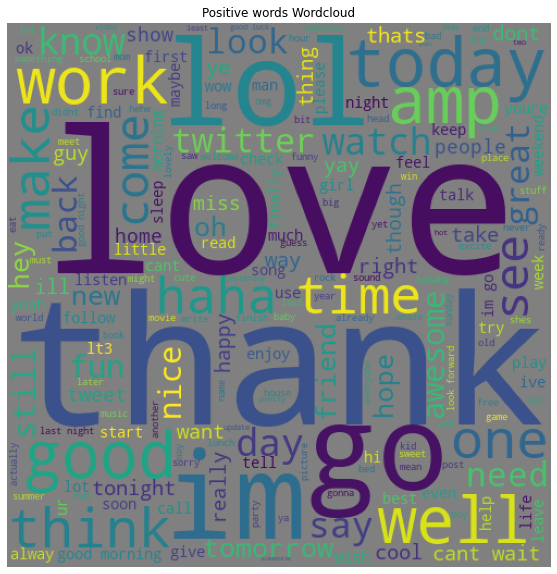

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt 
def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud) 
    plt.title('Positive words Wordcloud')
    plt.axis("off");
wordcloud = WordCloud(width = 500, height = 500, background_color='grey', random_state=10).generate(Pos_tgt_text)
plot_cloud(wordcloud)


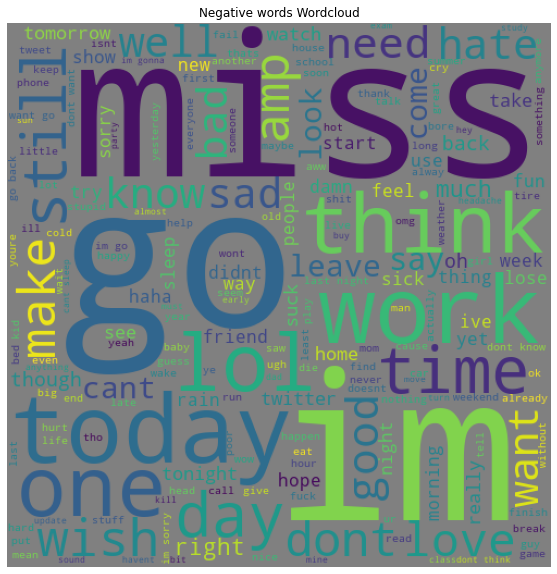

In [ ]:

from wordcloud import WordCloud
import matplotlib.pyplot as plt 
def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud) 
    plt.title('Negative words Wordcloud')
    plt.axis("off");
wordcloud = WordCloud(width = 500, height = 500, background_color='grey', random_state=10).generate(Neg_tgt_text)
plot_cloud(wordcloud)


***Vectorization*** ***and*** ***Splitting*** ***the*** ***Data*** 

In [32]:
X = data['text_processed'].values 
y = data['polarity'].values

In [33]:
#Convert a collection of raw documents to a matrix of TF-IDF features.
vector = TfidfVectorizer(sublinear_tf=True)
X = vector.fit_transform(X)
print(f'Vector fitted.')
print('No. of feature_words: ', len(vector.get_feature_names()))

Vector fitted.
No. of feature_words:  169978


***Split*** ***Train*** ***and*** ***Test***

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=101)

In [35]:
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print() 
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_train (160000, 169978)
y_train (160000,)

X_test (40000, 169978)
y_test (40000,)


***MODEL*** ***BUILDING***

***Logistic*** ***Regression*** ***Model***

In [ ]:

LR = LogisticRegression(max_iter =500)
LR_model=LR.fit(X_train, y_train)

acc_train=LR_model.score(X_train, y_train)
acc_test=LR_model.score(X_test, y_test)
cvs_LR = cross_val_score(LR_model, X, y, cv=5)

print("Accuracy of LR_Model with Cross Validation is:",cvs_LR.mean() * 100) 
print('Accuracy of Logistic Regression Model on training data : {}'.format(acc_train*100))
print('Accuracy of Logistic Regression Model on testing data : {} \n'.format(acc_test*100))


Accuracy of LR_Model with Cross Validation is: 76.8105
Accuracy of Logistic Regression Model on training data : 83.010625
Accuracy of Logistic Regression Model on testing data : 76.77000000000001 



              precision    recall  f1-score   support

           0    0.78419   0.73981   0.76135     20035
           1    0.75293   0.79569   0.77372     19965

    accuracy                        0.76770     40000
   macro avg    0.76856   0.76775   0.76754     40000
weighted avg    0.76859   0.76770   0.76752     40000



Text(0.5, 1.0, 'Confusion Matrix')

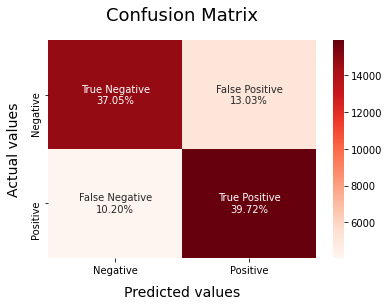

In [ ]:

y_pred = LR_model.predict(X_test)
print(metrics.classification_report(y_test, y_pred,  digits=5))
cf_matrix = confusion_matrix(y_test, y_pred)

categories  = ['Negative','Positive']
group_names = ['True Negative','False Positive', 'False Negative','True Positive']
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix, annot = labels, cmap = 'Reds',fmt = '',
                xticklabels = categories, yticklabels = categories)

plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)


***Random*** ***Forest*** ***Model***

In [ ]:

Rf = RandomForestClassifier(n_estimators = 50, criterion = 'gini', max_depth=50)
Rf_model=Rf.fit(X_train, y_train)

acc_train=Rf_model.score(X_train, y_train)
acc_test=Rf_model.score(X_test, y_test)
cvs_Rf = cross_val_score(Rf_model, X, y, cv=5)

print("Accuracy of Rf_Model with Cross Validation is:",cvs_Rf.mean() * 100)  
print('Accuracy of Random Forest Model on training data : {}'.format(acc_train*100))
print('Accuracy of Random Forest Model on testing data : {} \n'.format(acc_test*100))


Accuracy of Rf_Model with Cross Validation is: 73.27
Accuracy of Random Forest Model on training data : 79.104375
Accuracy of Random Forest Model on testing data : 73.1275 



              precision    recall  f1-score   support

           0    0.75215   0.69129   0.72043     20035
           1    0.71347   0.77140   0.74131     19965

    accuracy                        0.73128     40000
   macro avg    0.73281   0.73135   0.73087     40000
weighted avg    0.73284   0.73128   0.73085     40000



Text(0.5, 1.0, 'Confusion Matrix')

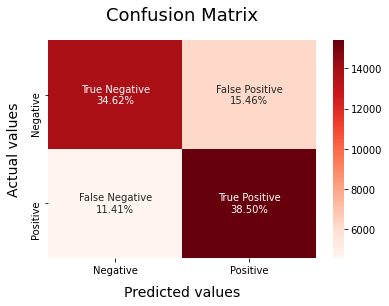

In [ ]:

y_pred = Rf_model.predict(X_test)
print(metrics.classification_report(y_test, y_pred,  digits=5))
cf_matrix = confusion_matrix(y_test, y_pred)

categories  = ['Negative','Positive']
group_names = ['True Negative','False Positive', 'False Negative','True Positive']
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix, annot = labels, cmap = 'Reds',fmt = '',
                xticklabels = categories, yticklabels = categories)

plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)


***Naive*** ***Bayes***

In [ ]:

mnb = MultinomialNB()
mnb_model=mnb.fit(X_train, y_train)

acc_train=mnb_model.score(X_train, y_train)
acc_test=mnb_model.score(X_test, y_test)
cvs_mnb = cross_val_score(mnb_model, X, y, cv=5) 

print("Accuracy of mnb_Model with Cross Validation is:",cvs_mnb.mean() * 100)  
print('Accuracy of Multinomial Naive Bayes Model on training data : {}'.format(acc_train*100))
print('Accuracy of Multinomial Naive Bayes Model on testing data : {} \n'.format(acc_test*100))


Accuracy of mnb_Model with Cross Validation is: 74.61399999999999
Accuracy of Multinomial Naive Bayes Model on training data : 86.83375
Accuracy of Multinomial Naive Bayes Model on testing data : 74.5525 



              precision    recall  f1-score   support

           0    0.72124   0.80185   0.75941     20035
           1    0.77604   0.68901   0.72994     19965

    accuracy                        0.74552     40000
   macro avg    0.74864   0.74543   0.74467     40000
weighted avg    0.74859   0.74552   0.74470     40000



Text(0.5, 1.0, 'Confusion Matrix')

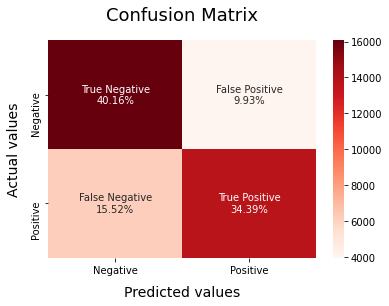

In [ ]:

y_pred = mnb_model.predict(X_test)
print(metrics.classification_report(y_test, y_pred,  digits=5))
cf_matrix = confusion_matrix(y_test, y_pred)

categories  = ['Negative','Positive']
group_names = ['True Negative','False Positive', 'False Negative','True Positive']
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix, annot = labels, cmap = 'Reds',fmt = '',
                xticklabels = categories, yticklabels = categories)

plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)


***Linear*** ***SVM***

In [ ]:
svm = LinearSVC()
svm_model=svm.fit(X_train, y_train) 

acc_train=svm_model.score(X_train, y_train)
acc_test=svm_model.score(X_test, y_test)
cvs_svm = cross_val_score(svm_model, X, y, cv=5) 

print("Accuracy of SVM_Model with Cross Validation is:",cvs_svm.mean() * 100)
print('Accuracy of SVM Model on training data : {}'.format(acc_train*100))
print('Accuracy of SVM Model on testing data : {} \n'.format(acc_test*100))


Accuracy of SVM_Model with Cross Validation is: 75.80199999999999
Accuracy of SVM Model on training data : 92.6925
Accuracy of SVM Model on testing data : 75.685 



              precision    recall  f1-score   support

           0    0.76656   0.73986   0.75297     20035
           1    0.74776   0.77390   0.76061     19965

    accuracy                        0.75685     40000
   macro avg    0.75716   0.75688   0.75679     40000
weighted avg    0.75718   0.75685   0.75678     40000



Text(0.5, 1.0, 'Confusion Matrix')

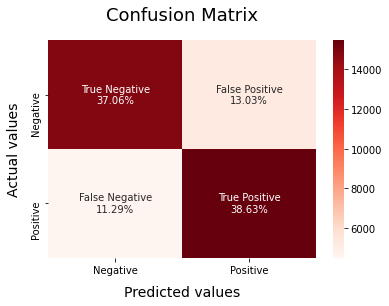

In [ ]:

y_pred = svm_model.predict(X_test)
print(metrics.classification_report(y_test, y_pred,  digits=5))
cf_matrix = confusion_matrix(y_test, y_pred)

categories  = ['Negative','Positive']
group_names = ['True Negative','False Positive', 'False Negative','True Positive']
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix, annot = labels, cmap = 'Reds',fmt = '',
                xticklabels = categories, yticklabels = categories)

plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)


***Perceptron***

In [ ]:

Per = Perceptron()
p_model = Per.fit(X_train, y_train)
acc_train=p_model.score(X_train, y_train)
acc_test=p_model.score(X_test, y_test)
cvs_p = cross_val_score(p_model, X, y, cv=5) 

print("Accuracy of p_Model with Cross Validation is:",cvs_p.mean() * 100)
print('Accuracy of Perceptron Model on training data : {}'.format(acc_train*100))
print('Accuracy of Perceptron Model on testing data : {} \n'.format(acc_test*100))


Accuracy of p_Model with Cross Validation is: 70.5835
Accuracy of Perceptron Model on training data : 90.64
Accuracy of Perceptron Model on testing data : 70.6925 



              precision    recall  f1-score   support

           0    0.70718   0.70806   0.70762     20035
           1    0.70667   0.70579   0.70623     19965

    accuracy                        0.70693     40000
   macro avg    0.70692   0.70692   0.70692     40000
weighted avg    0.70692   0.70693   0.70692     40000



Text(0.5, 1.0, 'Confusion Matrix')

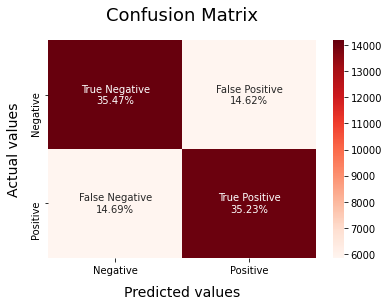

In [ ]:

y_pred = p_model.predict(X_test)
print(metrics.classification_report(y_test, y_pred,  digits=5))
cf_matrix = confusion_matrix(y_test, y_pred)

categories  = ['Negative','Positive']
group_names = ['True Negative','False Positive', 'False Negative','True Positive']
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix, annot = labels, cmap = 'Reds',fmt = '',
                xticklabels = categories, yticklabels = categories)

plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)


***Further*** ***Analysis*** 

In [ ]:
def hashtag_Pattern(x):
    hashtags = []
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags 


In [ ]:
data["text_lower"] = data["text"].str.lower()
HT_Negative = hashtag_Pattern(data["text_lower"][data['polarity'] == 0])
HT_Positive = hashtag_Pattern(data["text_lower"][data['polarity'] == 1])

# unnesting list
HT_Positive = sum(HT_Positive,[])
HT_Negative = sum(HT_Negative,[])

HT_Negative = [x for x in HT_Negative if not (x.isdigit() 
                                         or x[0] == '-' and x[1:].isdigit())]

HT_Positive = [x for x in HT_Positive if not (x.isdigit() 
                                         or x[0] == '-' and x[1:].isdigit())]


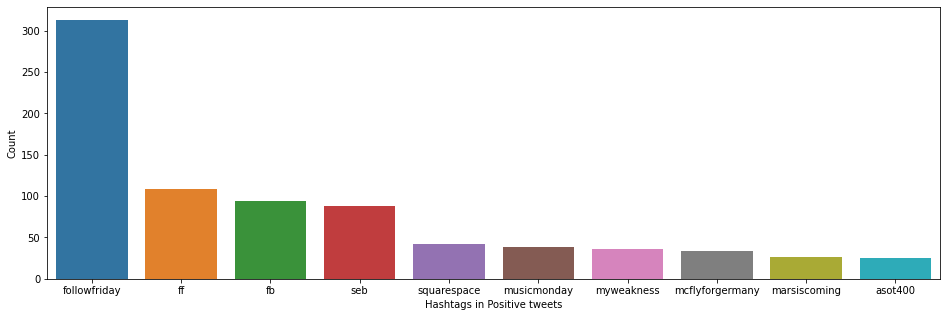

In [ ]:

a = nltk.FreqDist(HT_Positive)
d = pd.DataFrame({'Hashtag': list(a.keys()),'Count': list(a.values())})
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count') 
ax.set(xlabel = 'Hashtags in Positive tweets') 
plt.show()


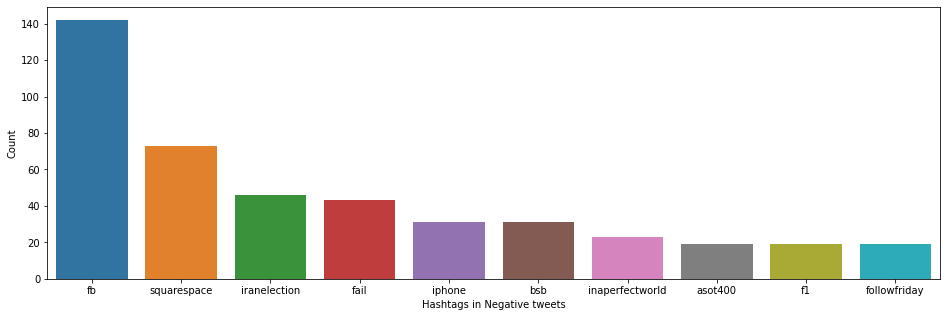

In [ ]:

b = nltk.FreqDist(HT_Negative)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})
e = e.nlargest(columns="Count", n = 10)   
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
ax.set(xlabel = 'Hashtags in Negative tweets') 
plt.show() 


In [ ]:

! pip install text2emotion
import text2emotion as te


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
#data
df_list = data['text_processed'].values.tolist()
lis = []   
for i in range(0,len(df_list)) :
  txt = df_list[i] 
  Tv = te.get_emotion(txt)
  Keymax = max(Tv, key= lambda x: Tv[x])
  lis.append(Keymax)      
  

In [ ]:
data['Emotion'] = lis
data.head() 

,polarity,id,date,query,user,text,word count,text_processed,text_lower,Emotion
0,0,2060397371,Sat Jun 06 18:49:48 PDT 2009,NO_QUERY,savannahschultz,Church was amazing! I'm not to happpy right no...,14,church amaze im happpy right though im sunburnt,church was amazing! i'm not to happpy right no...,Surprise
1,0,2068744559,Sun Jun 07 14:37:17 PDT 2009,NO_QUERY,CGRY,Can't believe Margaret is leaving though,6,cant believe margaret leave though,can't believe margaret is leaving though,Sad
2,1,2015106518,Wed Jun 03 03:43:16 PDT 2009,NO_QUERY,chris_official,Hey guys i am Sitting right now outside here a...,16,hey guy sit right outside alone 19th birthday ...,hey guys i am sitting right now outside here a...,Surprise
3,0,2245441359,Fri Jun 19 16:08:12 PDT 2009,NO_QUERY,vondahugnkiss,I miss the Lime Spider,5,miss lime spider,i miss the lime spider,Sad
4,0,1573978769,Tue Apr 21 03:44:37 PDT 2009,NO_QUERY,daftapeth,Cherry tree update: But the first day of full ...,17,cherry tree update first day full bloom also b...,cherry tree update: but the first day of full ...,Surprise


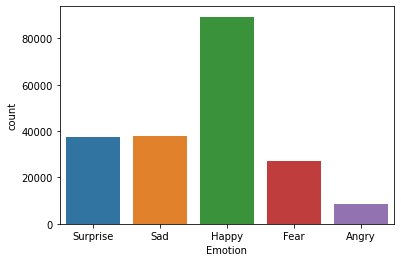

In [ ]:
sns.countplot(x = 'Emotion', data = data) 

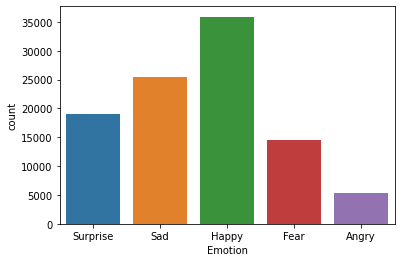

In [ ]:
sns.countplot(x = 'Emotion', data = data[data['polarity'] == 0]) 
 

(array([0, 0, 1, ..., 0, 0, 1]),
 <matplotlib.axes._subplots.AxesSubplot at 0x7fdd8dfcc7d0>)

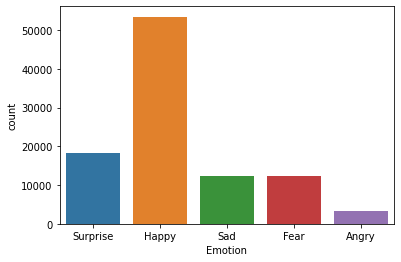

In [ ]:
y, sns.countplot(x = 'Emotion', data = data[data['polarity'] == 1]) 

Emotion vs Hashtag plots

In [ ]:

HT_Sad = hashtag_Pattern(data["text_lower"][data['Emotion'] == 'Sad'])
HT_Happy = hashtag_Pattern(data["text_lower"][data['Emotion'] == 'Happy'])
HT_Angry = hashtag_Pattern(data["text_lower"][data['Emotion'] == 'Angry'])
HT_Surprise = hashtag_Pattern(data["text_lower"][data['Emotion'] == 'Surprise'])
HT_Fear = hashtag_Pattern(data["text_lower"][data['Emotion'] == 'Fear'])
# unnesting list
HT_Sad = sum(HT_Sad,[])
HT_Happy = sum(HT_Happy,[])
HT_Angry = sum(HT_Angry,[])
HT_Surprise = sum(HT_Surprise,[])
HT_Fear = sum(HT_Fear,[])

HT_Sad = [x for x in HT_Sad if not (x.isdigit() 
                                         or x[0] == '-' and x[1:].isdigit())]

HT_Happy = [x for x in HT_Happy if not (x.isdigit() 
                                         or x[0] == '-' and x[1:].isdigit())]

HT_Angry = [x for x in HT_Angry if not (x.isdigit() 
                                         or x[0] == '-' and x[1:].isdigit())]

HT_Surprise = [x for x in HT_Surprise if not (x.isdigit() 
                                         or x[0] == '-' and x[1:].isdigit())]

HT_Fear = [x for x in HT_Fear if not (x.isdigit() 
                                         or x[0] == '-' and x[1:].isdigit())] 
                                                                                                                      

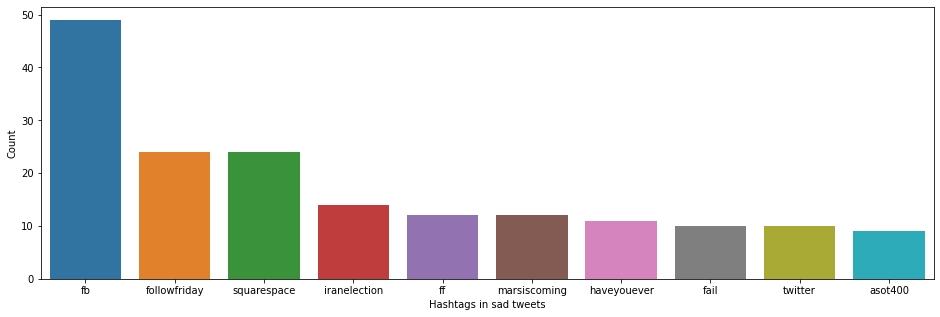

In [ ]:

a = nltk.FreqDist(HT_Sad)
d = pd.DataFrame({'Hashtag': list(a.keys()),'Count': list(a.values())})
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count') 
ax.set(xlabel = 'Hashtags in sad tweets') 
plt.show()


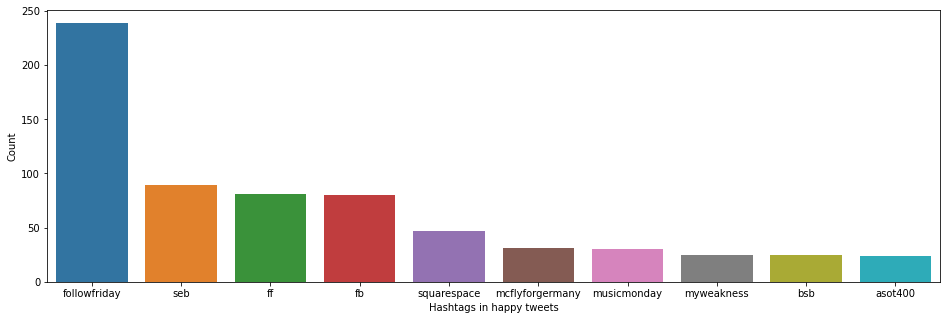

In [ ]:

a = nltk.FreqDist(HT_Happy)
d = pd.DataFrame({'Hashtag': list(a.keys()),'Count': list(a.values())})
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count') 
ax.set(xlabel = 'Hashtags in happy tweets') 
plt.show()

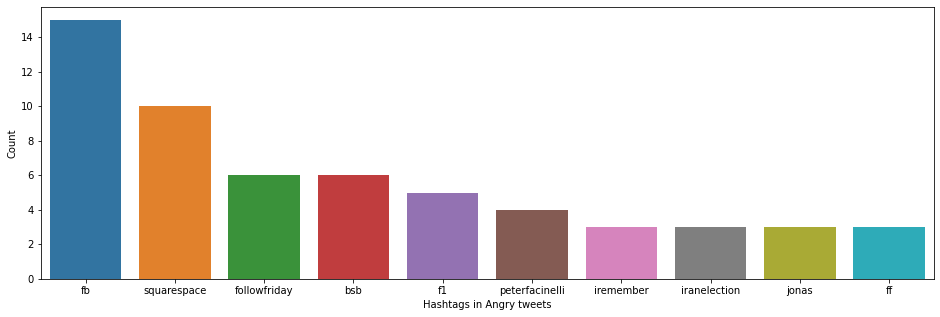

In [ ]:

a = nltk.FreqDist(HT_Angry)
d = pd.DataFrame({'Hashtag': list(a.keys()),'Count': list(a.values())})
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count') 
ax.set(xlabel = 'Hashtags in Angry tweets') 
plt.show()


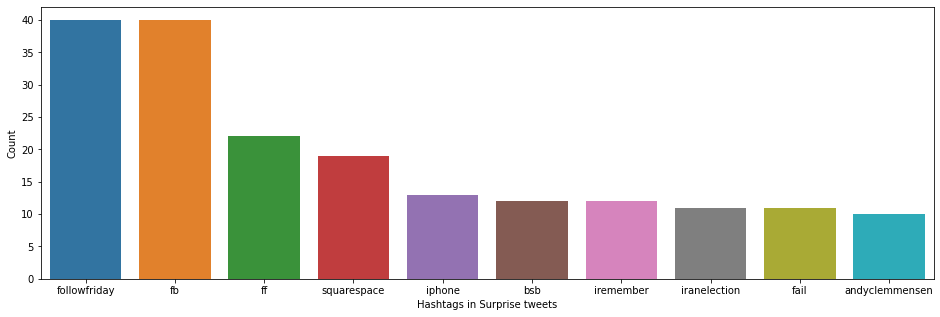

In [ ]:

a = nltk.FreqDist(HT_Surprise)
d = pd.DataFrame({'Hashtag': list(a.keys()),'Count': list(a.values())})
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count') 
ax.set(xlabel = 'Hashtags in Surprise tweets') 
plt.show()


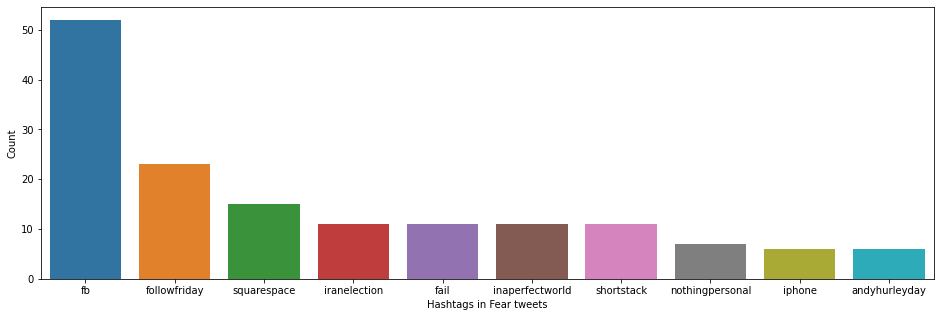

In [ ]:

a = nltk.FreqDist(HT_Fear)
d = pd.DataFrame({'Hashtag': list(a.keys()),'Count': list(a.values())})
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count') 
ax.set(xlabel = 'Hashtags in Fear tweets') 
plt.show()
